<a href="https://colab.research.google.com/github/prashantmane091318/ML/blob/main/admission_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf

In [ ]:
df=pd.read_csv("/content/sample_data/Admission_Predict.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt

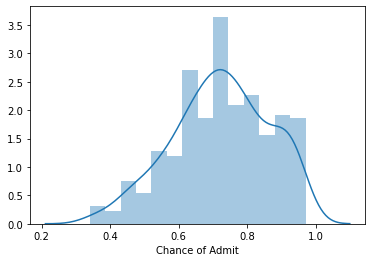

In [ ]:
sns.distplot(df["Chance of Admit"])

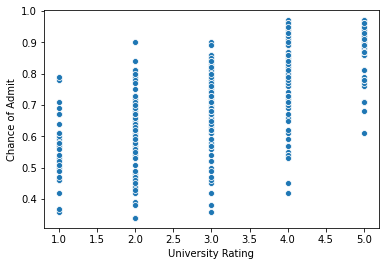

In [ ]:
sns.scatterplot(x=df["University Rating"],y=df["Chance of Admit"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
df.corr()["Chance of Admit"]

Serial No.           0.008505
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

In [ ]:
x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA']]

In [ ]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [ ]:
y=df["Chance of Admit"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((375, 6), (375,), (125, 6), (125,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
x_train_scale=scale.fit_transform(xtrain)

In [ ]:
x_train_scale

array([[-1.57884335, -1.17111757, -1.88482457, -1.93767618, -1.65378367,
        -1.17809274],
       [-0.51077434, -0.52858782, -1.00789006, -1.4382751 , -1.65378367,
        -0.50111652],
       [ 0.46828893, -0.68922025,  0.74597895, -0.43947295, -1.11167801,
        -0.96344174],
       ...,
       [-2.37989511, -0.52858782,  0.74597895, -1.4382751 , -1.11167801,
        -1.8880922 ],
       [ 1.9813867 ,  1.88089878,  1.62291346,  1.05873029,  0.51463898,
         1.81050963],
       [ 0.46828893,  0.43520682,  0.74597895,  0.55932921,  1.5988503 ,
         0.86934755]])

In [ ]:
x_train_scale.shape

(375, 6)

In [ ]:
x_test_scale=scale.transform(xtest)

In [ ]:
x_test_scale

array([[ 0.11226592, -0.20732294, -1.00789006,  0.55932921,  0.51463898,
        -1.1285579 ],
       [ 0.37928317,  1.07773658,  0.74597895,  0.55932921,  1.5988503 ,
         0.85283594],
       [ 0.37928317,  0.59583926, -0.13095555, -0.93887403, -0.56957235,
         0.4895804 ],
       [ 1.00232343,  1.39900146,  1.62291346,  1.05873029,  1.5988503 ,
         0.78678948],
       [-1.40083185, -0.84985269, -0.13095555, -0.93887403, -1.65378367,
        -0.78181398],
       [-0.24375708, -0.36795538, -0.13095555,  0.05992813, -1.11167801,
        -0.50111652],
       [-1.6678491 , -1.01048513, -1.00789006, -1.93767618, -1.65378367,
        -1.22762759],
       [-1.3118261 ,  0.43520682, -0.13095555,  0.55932921,  1.05674464,
        -0.17088421],
       [-1.75685485, -1.17111757, -1.88482457, -1.93767618, -1.65378367,
        -1.16158113],
       [ 0.64630043, -0.36795538, -0.13095555, -0.43947295,  0.51463898,
         0.24190617],
       [ 0.02326017, -0.68922025, -1.00789006, -0.

In [ ]:
x_test_scale.shape

(125, 6)

In [ ]:
ytrain.shape

(375,)

In [ ]:
import numpy as np

In [ ]:
ytrain=np.array(ytrain)

In [ ]:
ytrain=ytrain.reshape(-1,1)

In [ ]:
ytrain.shape

(375, 1)

In [ ]:
ytest=np.array(ytest)

In [ ]:
ytest=ytest.reshape(-1,1)

In [ ]:
scale1=StandardScaler()

In [ ]:
ytrain_scale=scale1.fit_transform(ytrain)

In [ ]:
ytest_scale=scale1.transform(ytest)

In [ ]:
ytest_scale

array([[-0.60804348],
       [ 0.87166679],
       [ 0.51935482],
       [ 1.29444115],
       [-0.32619391],
       [-1.31266742],
       [-1.31266742],
       [-0.53758109],
       [-1.45359221],
       [ 0.44889242],
       [-0.53758109],
       [ 0.09658045],
       [-0.60804348],
       [ 0.44889242],
       [ 1.15351636],
       [-2.08775376],
       [ 0.58981721],
       [ 0.02611806],
       [ 0.51935482],
       [-1.03081785],
       [-1.10128024],
       [ 0.09658045],
       [-0.88989306],
       [ 1.43536594],
       [ 1.08305397],
       [-0.3966563 ],
       [-0.18526912],
       [-1.10128024],
       [-1.73544179],
       [-0.60804348],
       [-0.25573152],
       [-1.80590418],
       [-1.10128024],
       [ 1.01259158],
       [-2.36960333],
       [-1.38312982],
       [ 0.80120439],
       [ 1.15351636],
       [-0.67850588],
       [-0.18526912],
       [-0.04434433],
       [ 0.94212918],
       [ 1.29444115],
       [ 0.16704285],
       [ 0.09658045],
       [ 0

In [ ]:
hidden_layer1=tf.keras.layers.Dense(100,activation="relu",input_shape=(6,))

In [ ]:
hidden_layer2=tf.keras.layers.Dense(150,activation="relu")

In [ ]:
hidden_layer3=tf.keras.layers.Dense(150,activation="relu")

In [ ]:
hidden_layer4=tf.keras.layers.Dense(50,activation="linear")

In [ ]:
output_layer=tf.keras.layers.Dense(1)

In [ ]:
model=tf.keras.models.Sequential()

In [ ]:
model.add(hidden_layer1)

In [ ]:
model.add(hidden_layer2)

In [ ]:
model.add(hidden_layer3)

In [ ]:
model.add(hidden_layer4)

In [ ]:
model.add(output_layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               700       
_________________________________________________________________
dense_1 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 46,101
Trainable params: 46,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="mse")

In [ ]:
model.fit(x_train_scale,ytrain,batch_size=20,epochs=100,validation_data=(x_test_scale,ytest))

Epoch 1/100
19/19 [==============================] - 0s 11ms/step - loss: 0.1689 - val_loss: 0.0735
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0438 - val_loss: 0.0260
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0213 - val_loss: 0.0171
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.0118
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0070
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0067
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0060
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0057
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0052
Epoch 11

In [ ]:
result=model.evaluate(x_test_scale,ytest)

4/4 [==============================] - 0s 2ms/step - loss: 0.0057


In [ ]:
accuracy1=1 - result

In [ ]:
accuracy1

0.9943387024104595

In [ ]:
yp=model.predict(x_test_scale)

In [ ]:
yp

array([[0.69300145],
       [0.8676293 ],
       [0.8027012 ],
       [0.87203413],
       [0.58187425],
       [0.63230956],
       [0.56531733],
       [0.729121  ],
       [0.55309856],
       [0.7672278 ],
       [0.58549184],
       [0.74336183],
       [0.564007  ],
       [0.73472726],
       [0.89732754],
       [0.5172542 ],
       [0.7849274 ],
       [0.6168554 ],
       [0.77637875],
       [0.7177971 ],
       [0.607265  ],
       [0.76850533],
       [0.53063685],
       [0.936602  ],
       [0.8387047 ],
       [0.72973824],
       [0.79399073],
       [0.5390047 ],
       [0.5512492 ],
       [0.57307655],
       [0.72275084],
       [0.56633157],
       [0.61336243],
       [0.8476989 ],
       [0.61669445],
       [0.58256197],
       [0.8332449 ],
       [0.87674206],
       [0.68438745],
       [0.6203365 ],
       [0.6902305 ],
       [0.89356714],
       [0.8069694 ],
       [0.71133184],
       [0.5442059 ],
       [0.77837527],
       [0.9510063 ],
       [0.763

In [ ]:
ytest

array([[0.64],
       [0.85],
       [0.8 ],
       [0.91],
       [0.68],
       [0.54],
       [0.54],
       [0.65],
       [0.52],
       [0.79],
       [0.65],
       [0.74],
       [0.64],
       [0.79],
       [0.89],
       [0.43],
       [0.81],
       [0.73],
       [0.8 ],
       [0.58],
       [0.57],
       [0.74],
       [0.6 ],
       [0.93],
       [0.88],
       [0.67],
       [0.7 ],
       [0.57],
       [0.48],
       [0.64],
       [0.69],
       [0.47],
       [0.57],
       [0.87],
       [0.39],
       [0.53],
       [0.84],
       [0.89],
       [0.63],
       [0.7 ],
       [0.72],
       [0.86],
       [0.91],
       [0.75],
       [0.74],
       [0.76],
       [0.96],
       [0.81],
       [0.6 ],
       [0.62],
       [0.69],
       [0.68],
       [0.59],
       [0.8 ],
       [0.71],
       [0.78],
       [0.69],
       [0.89],
       [0.67],
       [0.58],
       [0.44],
       [0.89],
       [0.53],
       [0.92],
       [0.66],
       [0.73],
       [0.

In [ ]:
xx=scale.transform([[299,100,1,1.5,2.0,7.89]])

In [ ]:
xx

array([[-1.57884335, -1.17111757, -1.88482457, -1.93767618, -1.65378367,
        -1.17809274]])

In [ ]:
model.predict(xx)

array([[0.5516888]], dtype=float32)

In [ ]:
import pickle

In [ ]:
pickle.dump(scale,open("mymodel.pkl","wb"))

In [ ]:
mm=pickle.load(open("/content/mymodel.pkl","rb"))

In [ ]:
!mkdir -p saved_model
model.save('saved_model/model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/model/assets


In [ ]:
new_model=tf.keras.models.load_model("/content/saved_model/model")

In [ ]:
new_model.evaluate(x_test_scale,ytest)

4/4 [==============================] - 0s 2ms/step - loss: 0.0057


0.005661297589540482

In [ ]:
from flask import Flask,request,render_template
from flask_ngrok import run_with_ngrok

In [ ]:
pip install flask_ngrok

In [ ]:
app=Flask(__name__)
run_with_ngrok(app)
@app.route("/")
def fun():
  return render_template("/content/sample_data/templates/titanic.html")
@app.route("/predict",methods=["post"])
def fun1():
  gre=int(request.form["gre"])
  TOEFL=int(request.form["TOEFL"])
  Rating=int(request.form["Rating"])
  SOP=float(request.form["SOP"])
  LOR=float(request.form["LOR"])
  CGPA=float(request.form["CGPA"])
  scale=pickle.load(open("/content/mymodel.pkl","rb"))
  xx=scale.transform([[gre,TOEFL,Rating,SOP,LOR,CGPA]])
  new_model=tf.keras.models.load_model("/content/saved_model/model")
  yy=new_model.predict(xx)
  return "predicted value is {}".format(yy)
app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://303b759f4676.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


[2020-07-08 17:48:16,139] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.6/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-75-da3f30efb135>", line 5, in fun
    return render_template("/content/sample_data/template